In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
file_path_new = "C:/Users/gram/Downloads/heart+disease/reprocessed.hungarian.data"

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df = pd.read_csv(file_path_new, names=column_names, sep=' ', header=None)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,-9.0,-9.0,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,-9.0,-9.0,0.0
293,53.0,1.0,4.0,130.0,182.0,0.0,0.0,148.0,0.0,0.0,-9.0,-9.0,-9.0,0.0


In [3]:
#결측치

df.isna().sum().to_numpy()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [4]:
#결측치 제거

cleaned_df = df.dropna()
cleaned_df.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [5]:
cleaned_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,48.0,0.0,2.0,-9.0,308.0,0.0,1.0,-9.0,-9.0,2.0,1.0,-9.0,-9.0,0.0
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,-9.0,-9.0,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,-9.0,-9.0,0.0


In [6]:
cleaned_df['num'].value_counts()

num
0.0    188
1.0     37
3.0     28
2.0     26
4.0     15
Name: count, dtype: int64

Text(0.5, 1.0, 'Label')

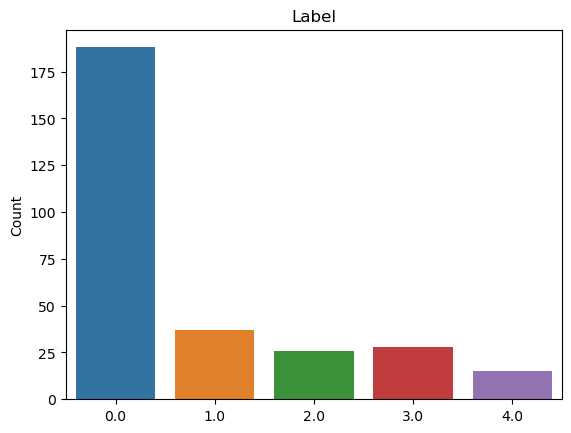

In [7]:
#Label 별 개수

sns.countplot(data = cleaned_df, x="num")
plt.xlabel("")
plt.ylabel("Count")
plt.title("Label")

In [8]:
# 각 클래스별로 5000개씩 데이터 추출
sampled_df = pd.DataFrame()  # 추출된 데이터를 저장할 빈 DataFrame 생성
classes = cleaned_df['num'].unique()  # 'Label' 열의 고유값을 추출하여 클래스 목록 생성

for cls in classes:
    class_df = cleaned_df[cleaned_df['num'] == cls]  # 현재 클래스에 해당하는 데이터만 필터링
    sampled_class_df = class_df.sample(n=150, replace=True)  # 클래스 데이터에서 5000개 샘플 추출, replace=True는 데이터가 5000개 미만일 때 중복 허용
    sampled_df = pd.concat([sampled_df, sampled_class_df], ignore_index=True)  # 추출된 데이터를 sampled_df에 추가
sampled_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,42.0,1.0,2.0,120.0,198.0,0.0,0.0,155.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,45.0,1.0,4.0,120.0,225.0,0.0,0.0,140.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
2,31.0,0.0,2.0,100.0,219.0,0.0,1.0,150.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,1.0,2.0,140.0,238.0,0.0,0.0,118.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
4,47.0,1.0,1.0,110.0,249.0,0.0,0.0,150.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,48.0,1.0,4.0,160.0,329.0,0.0,0.0,92.0,1.0,1.5,2.0,-9.0,-9.0,2.0
746,54.0,1.0,4.0,130.0,242.0,0.0,0.0,91.0,1.0,1.0,2.0,-9.0,-9.0,2.0
747,38.0,1.0,4.0,110.0,-9.0,0.0,0.0,150.0,1.0,1.0,2.0,-9.0,-9.0,2.0
748,54.0,1.0,4.0,130.0,242.0,0.0,0.0,91.0,1.0,1.0,2.0,-9.0,-9.0,2.0


In [9]:
sampled_df['num'].value_counts()

num
0.0    150
1.0    150
3.0    150
4.0    150
2.0    150
Name: count, dtype: int64

In [10]:
X = sampled_df.drop(['num'], axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,42.0,1.0,2.0,120.0,198.0,0.0,0.0,155.0,0.0,0.0,-9.0,-9.0,-9.0
1,45.0,1.0,4.0,120.0,225.0,0.0,0.0,140.0,0.0,0.0,-9.0,-9.0,-9.0
2,31.0,0.0,2.0,100.0,219.0,0.0,1.0,150.0,0.0,0.0,-9.0,-9.0,-9.0
3,48.0,1.0,2.0,140.0,238.0,0.0,0.0,118.0,0.0,0.0,-9.0,-9.0,-9.0
4,47.0,1.0,1.0,110.0,249.0,0.0,0.0,150.0,0.0,0.0,-9.0,-9.0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,48.0,1.0,4.0,160.0,329.0,0.0,0.0,92.0,1.0,1.5,2.0,-9.0,-9.0
746,54.0,1.0,4.0,130.0,242.0,0.0,0.0,91.0,1.0,1.0,2.0,-9.0,-9.0
747,38.0,1.0,4.0,110.0,-9.0,0.0,0.0,150.0,1.0,1.0,2.0,-9.0,-9.0
748,54.0,1.0,4.0,130.0,242.0,0.0,0.0,91.0,1.0,1.0,2.0,-9.0,-9.0


Text(0.5, 1.0, 'Label')

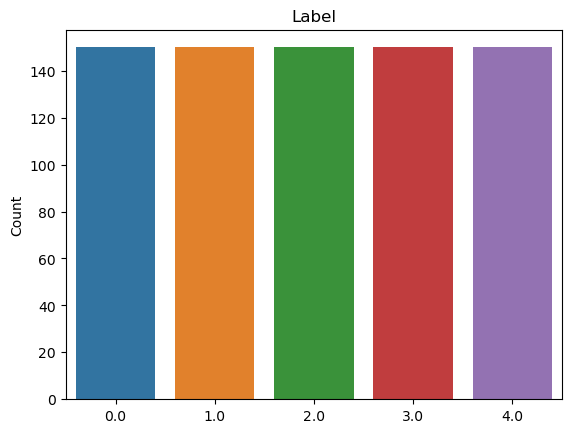

In [11]:
#Label 별 개수

sns.countplot(data = sampled_df, x="num")
plt.xlabel("")
plt.ylabel("Count")
plt.title("Label")

In [12]:
y = sampled_df['num']
y.value_counts()

num
0.0    150
1.0    150
3.0    150
4.0    150
2.0    150
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 23)
X_train = X_train.values
X_test = X_test.values
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600, 13), (150, 13), (600,), (150,))

In [14]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

(600, 13)
(150, 13)
(600, 5)
(150, 5)


In [16]:
#데이터셋을 3차원으로 변환

X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train.shape, X_test.shape

((600, 13, 1), (150, 13, 1))

In [17]:
from tensorflow.keras.layers import Conv1D, LSTM, Dropout, MaxPooling1D
from tensorflow.keras.layers import Input, Reshape
from keras.layers import Dense, Flatten, Dropout

In [18]:
input_layer = Input(shape=(13, 1))

conv1 = Conv1D(filters=48, kernel_size=6, padding = 'same', activation='relu')(input_layer)
reshaped = Reshape((-1, 48))(conv1)
lstm1 = LSTM(units=64, activation='relu', return_sequences=True)(reshaped)
dropout = Dropout(rate=0.3)(lstm1)
flatten = Flatten()(dropout)
dens1 = Dense(48, activation = "relu")(flatten)
outputs = Dense(5, activation = "softmax")(dens1)

model = keras.Model(input_layer, outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 13, 48)            336       
                                                                 
 reshape (Reshape)           (None, 13, 48)            0         
                                                                 
 lstm (LSTM)                 (None, 13, 64)            28928     
                                                                 
 dropout (Dropout)           (None, 13, 64)            0         
                                                                 
 flatten (Flatten)           (None, 832)               0         
                                                                 
 dense (Dense)               (None, 48)                39984 

In [19]:
train_epochs = 100
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, validation_data = (X_test, y_test_onehot))

Epoch 1/100
19/19 [==============================] - 6s 101ms/step - loss: 6.2763 - accuracy: 0.2333 - val_loss: 2.0174 - val_accuracy: 0.2467
Epoch 2/100
19/19 [==============================] - 1s 43ms/step - loss: 1.8910 - accuracy: 0.3017 - val_loss: 1.4147 - val_accuracy: 0.3533
Epoch 3/100
19/19 [==============================] - 1s 41ms/step - loss: 1.5719 - accuracy: 0.3083 - val_loss: 1.3998 - val_accuracy: 0.3533
Epoch 4/100
19/19 [==============================] - 1s 45ms/step - loss: 1.4868 - accuracy: 0.3517 - val_loss: 1.3969 - val_accuracy: 0.3933
Epoch 5/100
19/19 [==============================] - 1s 52ms/step - loss: 1.4320 - accuracy: 0.3833 - val_loss: 1.3867 - val_accuracy: 0.3533
Epoch 6/100
19/19 [==============================] - 1s 46ms/step - loss: 1.3897 - accuracy: 0.4000 - val_loss: 1.3309 - val_accuracy: 0.4267
Epoch 7/100
19/19 [==============================] - 1s 48ms/step - loss: 1.3758 - accuracy: 0.3783 - val_loss: 1.3172 - val_accuracy: 0.4667
Epoch

19/19 [==============================] - 1s 43ms/step - loss: 0.7074 - accuracy: 0.7117 - val_loss: 0.8052 - val_accuracy: 0.6600
Epoch 59/100
19/19 [==============================] - 1s 45ms/step - loss: 0.7037 - accuracy: 0.7050 - val_loss: 0.9125 - val_accuracy: 0.6133
Epoch 60/100
19/19 [==============================] - 1s 48ms/step - loss: 0.7290 - accuracy: 0.7150 - val_loss: 0.8512 - val_accuracy: 0.6733
Epoch 61/100
19/19 [==============================] - 1s 48ms/step - loss: 0.6961 - accuracy: 0.7250 - val_loss: 0.7741 - val_accuracy: 0.7067
Epoch 62/100
19/19 [==============================] - 1s 49ms/step - loss: 0.6729 - accuracy: 0.7350 - val_loss: 0.7213 - val_accuracy: 0.7267
Epoch 63/100
19/19 [==============================] - 1s 49ms/step - loss: 0.6602 - accuracy: 0.7350 - val_loss: 0.7145 - val_accuracy: 0.7133
Epoch 64/100
19/19 [==============================] - 1s 49ms/step - loss: 0.6585 - accuracy: 0.7467 - val_loss: 0.8241 - val_accuracy: 0.6933
Epoch 65/100

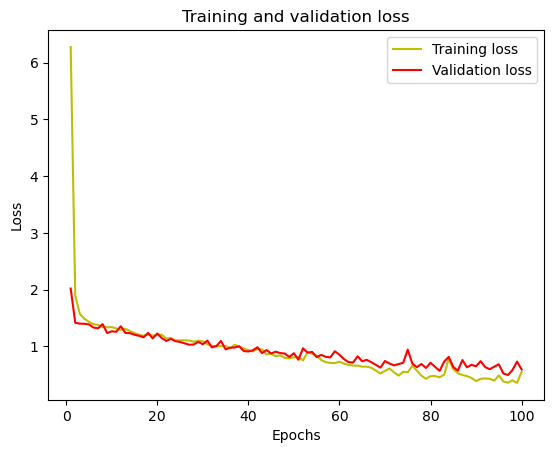

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

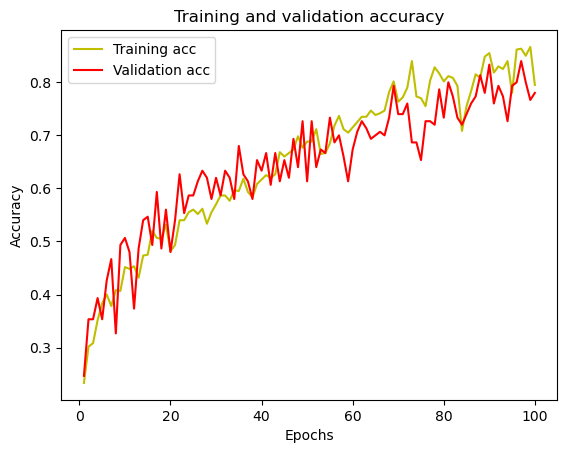

In [21]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [22]:
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

5/5 [==============================] - 1s 10ms/step


In [23]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.78      0.56      0.65        32
           1       0.77      0.70      0.73        33
           2       0.66      0.95      0.78        20
           3       0.84      0.77      0.81        35
           4       0.83      1.00      0.91        30

    accuracy                           0.78       150
   macro avg       0.78      0.80      0.78       150
weighted avg       0.79      0.78      0.77       150

[[18  7  5  1  1]
 [ 4 23  3  3  0]
 [ 0  0 19  1  0]
 [ 1  0  2 27  5]
 [ 0  0  0  0 30]]
